In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pydicom

sample = pydicom.dcmread("1-1.dcm")

In [ ]:
import matplotlib.pylab as plt
import numpy as np

In [ ]:
seg = sample.pixel_array

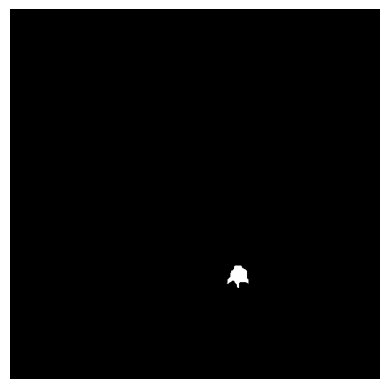

In [ ]:
plt.imshow(seg[0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
seg.max(), seg.min(), seg.shape

(1, 0, (7, 512, 512))

In [ ]:
for i in range(seg.shape[0]):
  if seg[i].max() == 1:
    print(i)


0
1
2
3
4
5
6


In [ ]:
print(seg[0] == 1)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


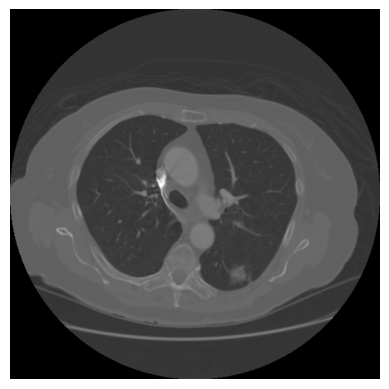

In [ ]:
ct = pydicom.dcmread("1-040.dcm").pixel_array
plt.imshow(ct, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

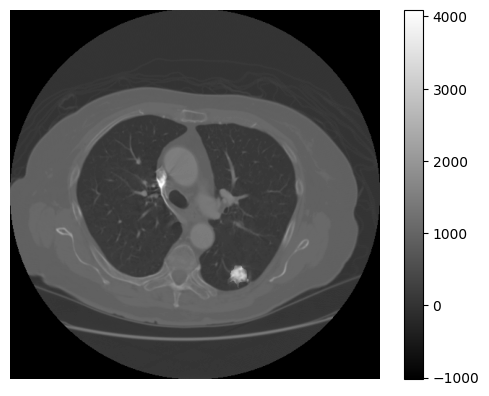

In [ ]:
plt.imshow(ct + ct*seg[0]*2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

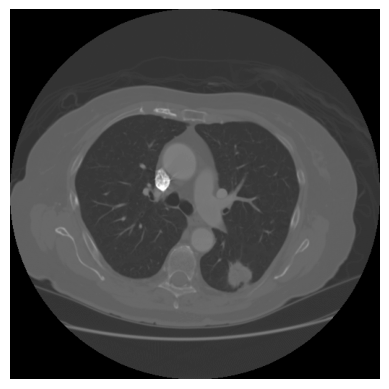

In [ ]:
ct = pydicom.dcmread("1-043.dcm").pixel_array
plt.imshow(ct, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

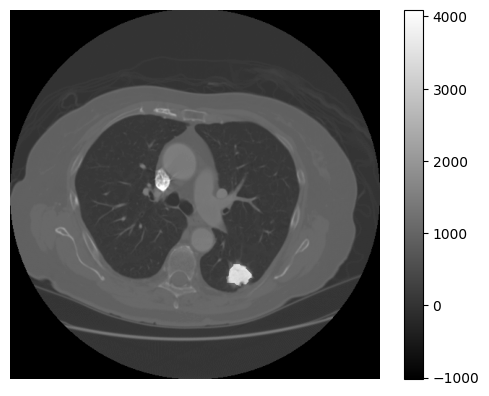

In [ ]:
plt.imshow(ct + ct*seg[1]*2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

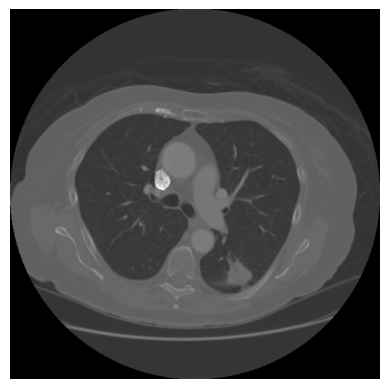

In [ ]:
ct = pydicom.dcmread("1-044.dcm").pixel_array
plt.imshow(ct, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
(ct*seg[0]*2).max()

2490

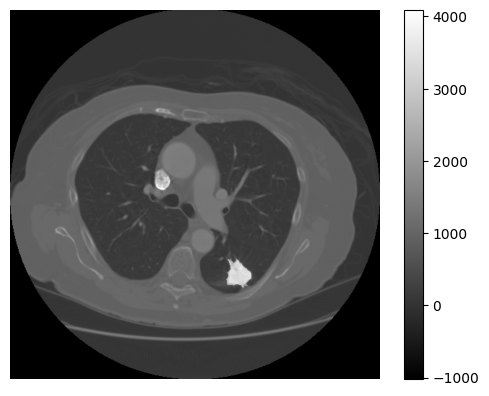

In [ ]:
plt.imshow(ct + ct*seg[2]*2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

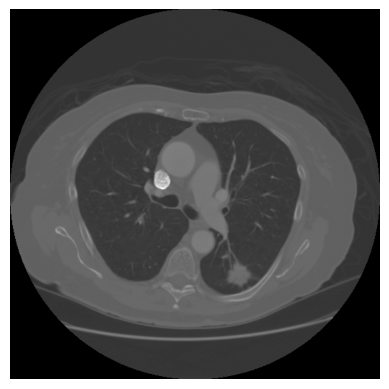

In [ ]:
ct = pydicom.dcmread("1-045.dcm").pixel_array
plt.imshow(ct, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

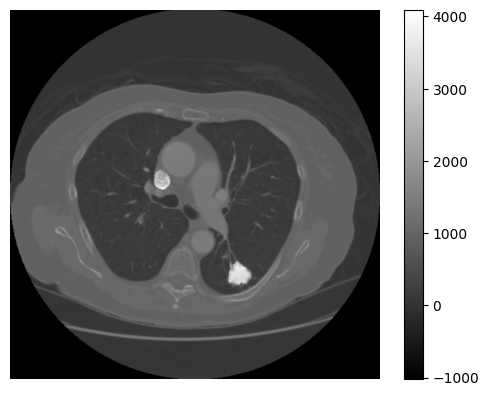

In [ ]:
plt.imshow(ct + ct*seg[3]*2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

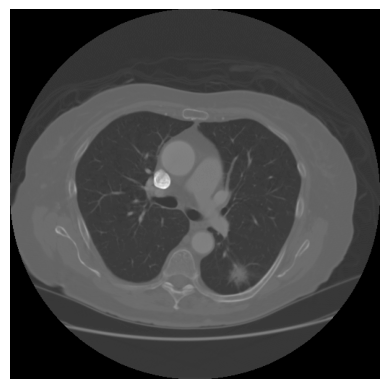

In [ ]:
ct = pydicom.dcmread("1-046.dcm").pixel_array
plt.imshow(ct, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

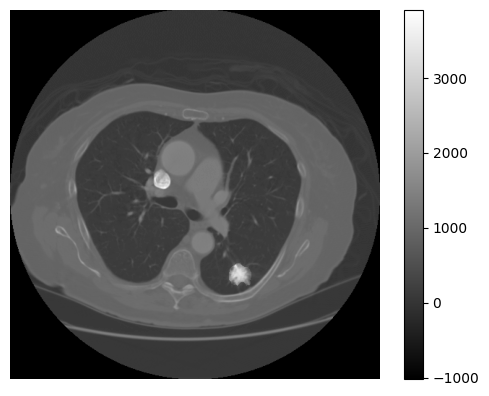

In [ ]:
plt.imshow(ct + ct*seg[4]*2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

In [ ]:
histogram, bin_edges = np.histogram(sample.pixel_array, bins=2377, range=(0, 2376))

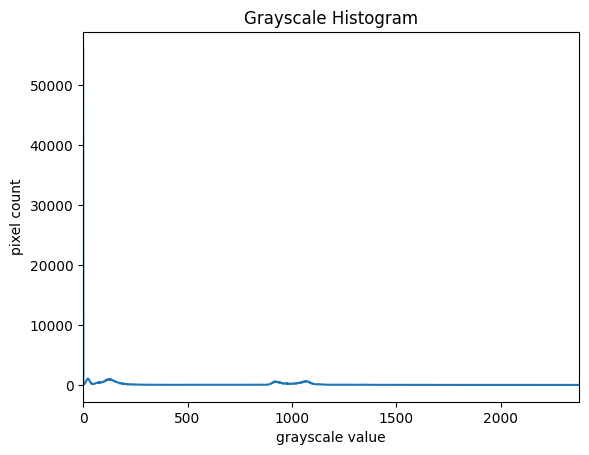

In [ ]:
# configure and draw the histogram figure
fig, ax = plt.subplots()
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0, 2376])  # <- named arguments do not work here

ax.plot(bin_edges[0:-1], histogram)  # <- or here

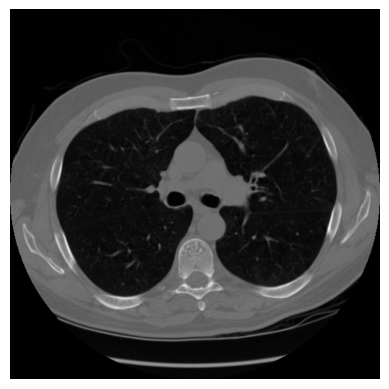

In [ ]:
import cv2
import numpy as np

def compute_pixel_density(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 255))
    pixel_density = hist / float(image.size)
    return pixel_density

# def weighted_mean_histogram_equalization(image, a, b):
#     cdf = np.cumsum(compute_pixel_density(image))
#     weighted_means = np.zeros_like(image.flatten(), dtype=float)
#     print(len(image.flatten()), len(weighted_means))
#     for i in range(len(image.flatten())):
#         numerator = np.sum([l * cdf[l] for l in range(a, b+1)])
#         denominator = np.sum([cdf[l] for l in range(a, b+1)])

#         weighted_means[i] = numerator / denominator if denominator != 0 else 0

    return weighted_means.reshape(image.shape)

def weighted_mean_histogram_equalization(image, a, b):
    cdf = np.cumsum(compute_pixel_density(image))
    weighted_means = np.zeros_like(image, dtype=float)

    for i in range(a, b+1):
        numerator = np.sum([l * cdf[l] for l in range(a, i+1)])
        denominator = np.sum([cdf[l] for l in range(a, i+1)])

        weighted_means += (numerator / denominator) * (image == i)
        # weighted_means += (i * cdf[i]) * (image==i)

    return weighted_means
# Load the lung CT image
image = sample.pixel_array

normalized = image.astype(np.float32) / image.max()
reg_image = (normalized * 255).astype(np.int32)
# reg_image = (normalized * 255)
# print(reg_image[2])
# Noise removal using image denoising techniques if needed

# Compute pixel density for the image
pixel_density = compute_pixel_density(reg_image)
# print(pixel_density)
# Specify the sub-interval values a and b for histogram equalization
a = 0
b = 255

# Apply weighted mean histogram equalization for image enhancement
enhanced_image = weighted_mean_histogram_equalization(reg_image, a, b)

# Display the original and enhanced images
# plt.imshow(image, cmap='gray')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

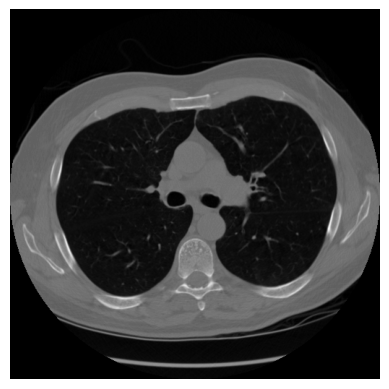

In [ ]:
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

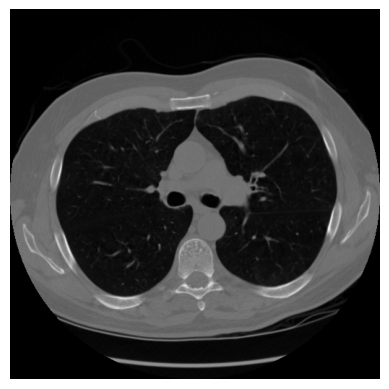

In [ ]:
plt.imshow(reg_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

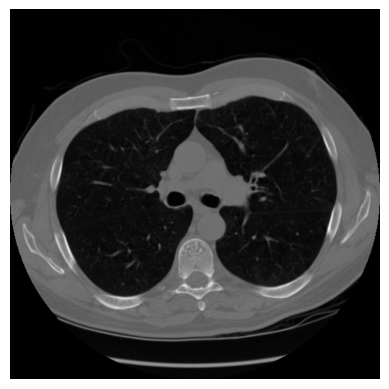

In [ ]:
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
enhanced_image.size, enhanced_image.max()

(262144, 143.97728279130018)

In [ ]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max

    return window_image

In [ ]:
image.max(), image.min()

(2610, 0)

In [ ]:
# Normalize pixel_array
normalized = (image.astype(np.float32) / image.max()).astype(np.int32)
normalized, normalized.max()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 1)

In [ ]:
from skimage import data, segmentation
from skimage.future import graph

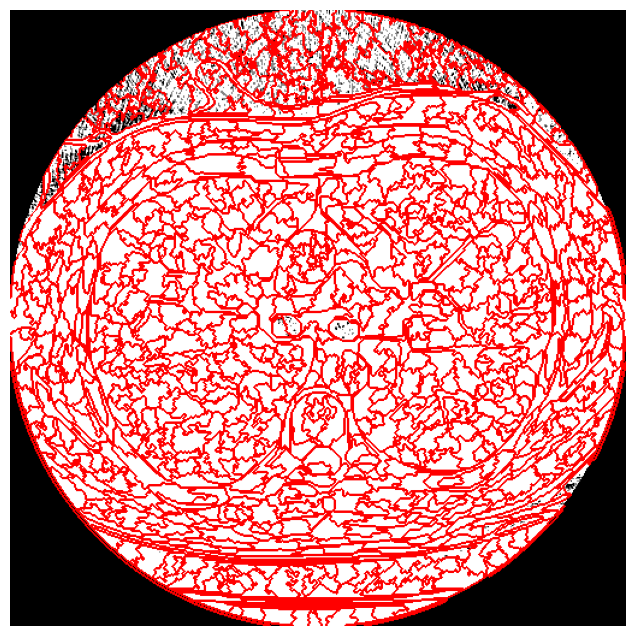

In [ ]:
import numpy as np
from skimage import io, segmentation, color
import matplotlib.pyplot as plt

# Load the enhanced lung CT image (replace 'enhanced_image_path' with the path to your image)
# enhanced_image = io.imread('enhanced_image_path')

# Apply IPCT for segmentation
labels = segmentation.felzenszwalb(enhanced_image, scale=100, sigma=0.5, min_size=50)

# Display the segmented image
plt.figure(figsize=(8, 8))
plt.imshow(segmentation.mark_boundaries(enhanced_image, labels, color=(1, 0, 0)))
plt.axis('off')
plt.show()

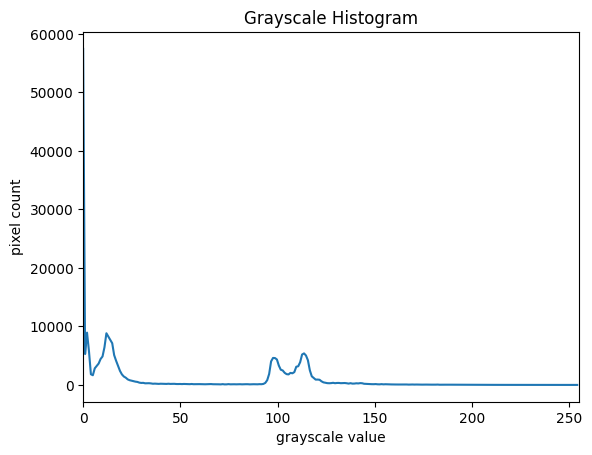

In [ ]:
histogram, bin_edges = np.histogram(reg_image, bins=256, range=(0, 255))
# configure and draw the histogram figure
fig, ax = plt.subplots()
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0, 255])  # <- named arguments do not work here

ax.plot(bin_edges[0:-1], histogram)  # <- or here

In [ ]:
# new_image = np.zeros_like(reg_image, dtype=int)
new_image = np.where(reg_image > 50, 0, reg_image)

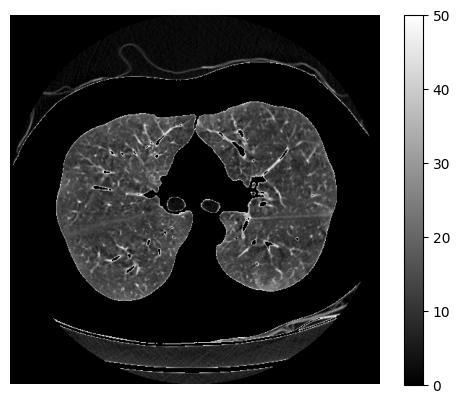

In [ ]:
plt.imshow(new_image, cmap='gray', vmin=0, vmax=50)
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

In [ ]:
new_image[200]

array([ 0,  0,  0,  0,  0,  0,  4,  9, 27,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 25, 12, 11, 13, 12, 13, 13, 10, 10,
       11, 10, 12, 14, 12, 10, 12, 14, 15, 15, 15, 15, 17, 22, 25, 22, 20,
       18, 15, 18, 22, 25, 24, 25, 26, 20, 17, 16, 15, 14, 11, 12, 15, 15,
       12, 12, 13, 12,  9,  9, 10, 16, 18, 12, 10,  9,  9,  9,  9, 12, 15,
       17, 15, 13, 13, 13, 11, 12, 14, 15, 14, 12, 11, 12, 15, 17, 15, 15,
       14, 14, 16, 17, 18, 18, 17, 16, 13, 14, 13, 13, 16, 21, 24, 21, 18,
       16, 14, 12, 11, 12, 11, 11, 15, 22, 22, 24, 21, 13, 11, 11, 12, 13,
       11, 13, 15, 14, 17, 17, 17, 21, 19, 16, 16, 14, 15, 16, 18, 25, 22,
       17, 14, 13, 13, 15, 16, 15, 17, 13, 10, 12, 18, 20, 13, 11, 13, 15,
       16, 14, 13, 13, 14

In [ ]:
crop